In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# Get all file names in current folder
files = os.listdir(".")


In [3]:
# Concatenate all dataframes in a single one
a = []
for f in files:
    if f.endswith(".csv"):
        if "ella" in f and "ella_50" not in f:
            continue
        a.append(pd.read_csv(f))
df = pd.concat(a)


In [4]:
df_ella = pd.concat(
    [pd.read_csv(f) for f in files if f.endswith(".csv") and "ella_50_0" in f]
)


In [5]:
df_ella2 = pd.concat(
    [
        pd.read_csv(f)
        for f in files
        if f.endswith(".csv") and "ella_" in f and "_0.5_r" in f
    ]
)


In [6]:
df

,NLL,ACC,ECE,BRIER,method,resnet,train_time,test_time,seed,rotated_10_NLL,...,rotated_180_ACC,rotated_180_ECE,rotated_180_BRIER,iterations,hessian,prior_precision,lower_da,batch_size,initial_lr,scheduler_gamma
0,0.198495,0.9398,0.017721,0.090575,mfvi,resnet44,558.059223,70.617735,0,0.317879,...,0.3561,0.377757,0.962594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.227527,0.9260,0.014201,0.111150,valla,resnet20,12514.178661,97.514046,4,0.359065,...,0.3299,0.306524,0.921255,40000.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0.220814,0.9398,0.020772,0.095746,lla last_layer full,resnet44,13.389760,2.470697,3,0.365608,...,0.3447,0.441501,1.035714,NaN,full,2.302957,NaN,NaN,NaN,NaN
0,0.190518,0.9444,0.017683,0.086407,ella,resnet56,4811.728649,76.148328,1,0.308787,...,0.3459,0.288347,0.900765,NaN,NaN,1.350000,0.5,50.0,NaN,NaN
0,0.192842,0.9441,0.024831,0.087539,ella,resnet56,3830.865818,76.561159,0,0.310524,...,0.3440,0.273868,0.889034,NaN,NaN,1.025000,0.6,50.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.238816,0.9349,0.019977,0.100090,sngp,resnet44,105.816095,2.584720,0,0.380465,...,0.3383,0.359282,0.980315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.227577,0.9259,0.014357,0.111167,valla,resnet20,11451.429798,155.234139,3,0.360080,...,0.3272,0.308282,0.924766,40000.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0.258265,0.9197,0.006460,0.119194,sngp,resnet20,73.906569,2.167187,2,0.402971,...,0.3316,0.357210,0.967796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.216169,0.9346,0.009796,0.098647,ella,resnet32,1602.403291,46.052481,3,0.338999,...,0.3357,0.328123,0.931136,NaN,NaN,0.650000,0.5,50.0,NaN,NaN


In [7]:
df["method"].unique()

array(['mfvi', 'valla', 'lla last_layer full', 'ella', 'sngp', 'map',
       'fmgp slow', 'lla last_layer kron', 'fmgp'], dtype=object)

In [8]:
resnets = df["resnet"].unique()
resnets.sort()
models = df["method"].unique()
models = [
    "fmgp slow",
    "lla last_layer full",
    "map",
    "lla last_layer kron",
    "ella",
    "valla",
    "sngp",
    "mfvi"
]
labels = ["FMGP", "LLA* (full)", "MAP", "LLA* (kron)", "ELLA", "VaLLA", "SNGP", "MFVI"]
print("Resnet models: ", resnets)
print("Models: ", models)


Resnet models:  ['resnet20' 'resnet32' 'resnet44' 'resnet56']
Models:  ['fmgp slow', 'lla last_layer full', 'map', 'lla last_layer kron', 'ella', 'valla', 'sngp', 'mfvi']


In [9]:
def std(x):
    return np.std(x) / len(x)


In [10]:
# Group by "method" and "resnet" and compute average and std
df_ella.drop(columns=["method"], inplace=True)
df_ella = df_ella.groupby(["resnet", "lower_da"]).agg(["mean", std])


In [11]:
df_ella2.drop(columns=["method"], inplace=True)
df_ella2 = df_ella2.groupby(["resnet", "batch_size"]).agg(["mean", std])


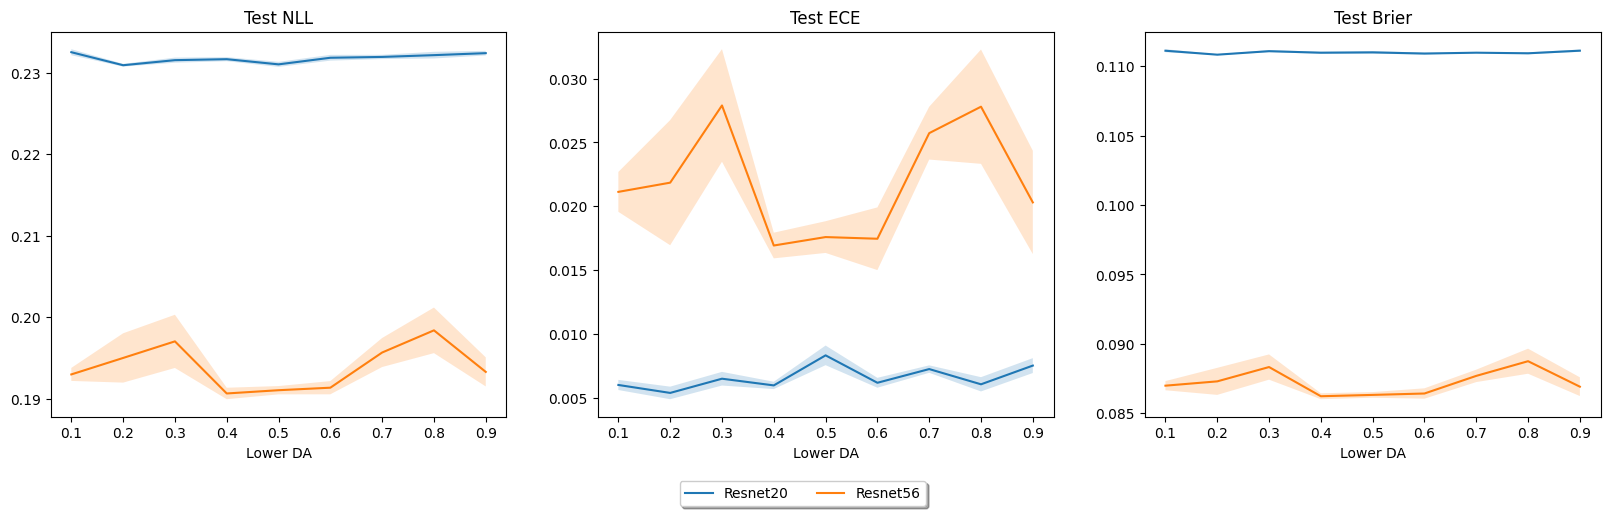

In [12]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
mean = []
std = []
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    # plot mean NLL
    mean.append(df_ella.loc[("resnet20", i), "NLL"]["mean"])
    std.append(df_ella.loc[("resnet20", i), "NLL"]["std"])
axis[0].plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], mean, label="Resnet20")
axis[0].fill_between(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)

mean = []
std = []
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    # plot mean NLL
    mean.append(df_ella.loc[("resnet20", i), "ECE"]["mean"])
    std.append(df_ella.loc[("resnet20", i), "ECE"]["std"])
axis[1].plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], mean, label="Resnet20")
axis[1].fill_between(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)

mean = []
std = []
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    # plot mean NLL
    mean.append(df_ella.loc[("resnet20", i), "BRIER"]["mean"])
    std.append(df_ella.loc[("resnet20", i), "BRIER"]["std"])
axis[2].plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], mean, label="Resnet20")
axis[2].fill_between(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)

mean = []
std = []
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    # plot mean NLL
    mean.append(df_ella.loc[("resnet56", i), "NLL"]["mean"])
    std.append(df_ella.loc[("resnet56", i), "NLL"]["std"])
axis[0].plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], mean, label="Resnet56")
axis[0].fill_between(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)

mean = []
std = []
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    # plot mean NLL
    mean.append(df_ella.loc[("resnet56", i), "ECE"]["mean"])
    std.append(df_ella.loc[("resnet56", i), "ECE"]["std"])
axis[1].plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], mean, label="Resnet56")
axis[1].fill_between(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)

mean = []
std = []
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    # plot mean NLL
    mean.append(df_ella.loc[("resnet56", i), "BRIER"]["mean"])
    std.append(df_ella.loc[("resnet56", i), "BRIER"]["std"])
axis[2].plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], mean, label="Resnet56")
axis[2].fill_between(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)


axis[0].set_title("Test NLL")
axis[0].set_xlabel("Lower DA")
axis[1].set_title("Test ECE")
axis[1].set_xlabel("Lower DA")
axis[2].set_title("Test Brier")
axis[2].set_xlabel("Lower DA")
plt.legend(
    loc="lower center",
    bbox_to_anchor=(-0.75, -0.25),
    ncol=3,
    fancybox=True,
    shadow=True,
)


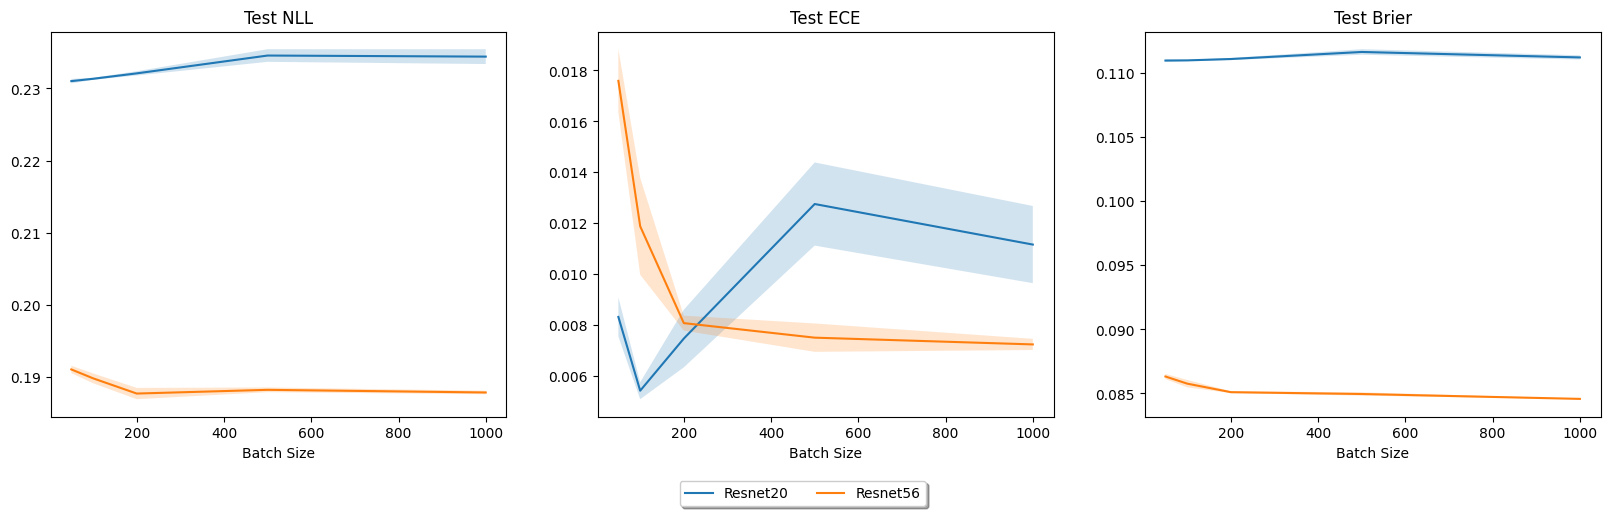

In [13]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
mean = []
std = []

array = [50, 100, 200, 500, 1000]

for i in array:
    # plot mean NLL
    mean.append(df_ella2.loc[("resnet20", i), "NLL"]["mean"])
    std.append(df_ella2.loc[("resnet20", i), "NLL"]["std"])
axis[0].plot(array, mean, label="Resnet20")
axis[0].fill_between(
    array,
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)

mean = []
std = []
for i in array:
    # plot mean NLL
    mean.append(df_ella2.loc[("resnet20", i), "ECE"]["mean"])
    std.append(df_ella2.loc[("resnet20", i), "ECE"]["std"])
axis[1].plot(array, mean, label="Resnet20")
axis[1].fill_between(
    array,
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)

mean = []
std = []
for i in array:
    # plot mean NLL
    mean.append(df_ella2.loc[("resnet20", i), "BRIER"]["mean"])
    std.append(df_ella2.loc[("resnet20", i), "BRIER"]["std"])
axis[2].plot(array, mean, label="Resnet20")
axis[2].fill_between(
    array,
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)

mean = []
std = []
for i in array:
    # plot mean NLL
    mean.append(df_ella2.loc[("resnet56", i), "NLL"]["mean"])
    std.append(df_ella2.loc[("resnet56", i), "NLL"]["std"])
axis[0].plot(array, mean, label="Resnet56")
axis[0].fill_between(
    array,
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)

mean = []
std = []
for i in array:
    # plot mean NLL
    mean.append(df_ella2.loc[("resnet56", i), "ECE"]["mean"])
    std.append(df_ella2.loc[("resnet56", i), "ECE"]["std"])
axis[1].plot(array, mean, label="Resnet56")
axis[1].fill_between(
    array,
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)

mean = []
std = []
for i in array:
    # plot mean NLL
    mean.append(df_ella2.loc[("resnet56", i), "BRIER"]["mean"])
    std.append(df_ella2.loc[("resnet56", i), "BRIER"]["std"])
axis[2].plot(array, mean, label="Resnet56")
axis[2].fill_between(
    array,
    np.array(mean) - 2 * np.array(std),
    np.array(mean) + 2 * np.array(std),
    alpha=0.2,
)


axis[0].set_title("Test NLL")
axis[0].set_xlabel("Batch Size")
axis[1].set_title("Test ECE")
axis[1].set_xlabel("Batch Size")
axis[2].set_title("Test Brier")
axis[2].set_xlabel("Batch Size")
plt.legend(
    loc="lower center",
    bbox_to_anchor=(-0.75, -0.25),
    ncol=3,
    fancybox=True,
    shadow=True,
)


In [14]:
def std(x):
    return np.std(x) / len(x)


In [15]:
df = df.drop(["lower_da", "hessian"], axis = 1)

In [16]:
# Group by "method" and "resnet" and compute average and std
df = df.groupby(["resnet", "method"]).agg(["mean", std])


In [17]:
df

NLL                    ACC                \
                                  mean           std     mean           std   
resnet   method                                                               
resnet20 ella                 0.232051  2.808783e-05  0.92569  6.755738e-06   
         fmgp                 0.227483  1.964924e-06  0.92620  0.000000e+00   
         fmgp slow            0.227487  3.071879e-06  0.92620  0.000000e+00   
         lla last_layer full  0.256627  4.979511e-09  0.92550  2.220446e-17   
         lla last_layer kron  0.265879  2.323316e-08  0.92550  2.220446e-17   
         map                  0.281522  0.000000e+00  0.92600  2.220446e-17   
         mfvi                 0.222248  3.615365e-04  0.92840  2.912044e-04   
         sngp                 0.262909  1.695384e-03  0.91948  2.840845e-04   
         valla                0.227307  8.614880e-05  0.92602  2.332381e-05   
resnet32 ella                 0.217724  2.782032e-04  0.93444  2.712932e-05   
         fmgp                 0.209903  2.586296e-06  0.93430  0.000000e+00   
         fmgp slow            0.209916  3.196630e-06  0.93430  0.000000e+00   
         lla last_layer full  0.237743  3.653962e-09  0.93500  2.220446e-17   
         lla last_layer kron  0.251803  2.392080e-09  0.93550  0.000000e+00   
         map                  0.292069  0.000000e+00  0.93530  0.000000e+00   
         mfvi                 0.211912  2.987784e-04  0.93490  6.196773e-05   
         sngp                 0.237043  9.262586e-04  0.93398  2.239286e-04   
         valla                0.209166  2.030497e-05  0.93426  9.797959e-06   
resnet44 ella                 0.206935  6.623550e-04  0.93934  1.170299e-04   
         fmgp                 0.198027  7.062055e-06  0.94000  2.220446e-17   
         fmgp slow            0.198024  6.041415e-06  0.94000  2.220446e-17   
         lla last_layer full  0.220814  3.088162e-09  0.93980  0.000000e+00   
         lla last_layer kron  0.230562  2.392080e-09  0.94000  2.220446e-17   
         map                  0.275259  0.000000e+00  0.94010  2.220446e-17   
         mfvi                 0.195677  3.656349e-04  0.93938  5.986652e-05   
         sngp                 0.232098  1.955951e-03  0.93526  2.415285e-04   
         valla                0.195838  3.217616e-05  0.94012  2.939388e-05   
resnet56 ella                 0.193340  1.124886e-04  0.94424  6.462198e-06   
         fmgp                 0.183003  2.982778e-06  0.94394  9.797959e-06   
         fmgp slow            0.183027  2.900027e-06  0.94394  9.797959e-06   
         lla last_layer full  0.200181  4.979511e-09  0.94350  0.000000e+00   
         lla last_layer kron  0.203735  4.367320e-09  0.94370  0.000000e+00   
         map                  0.252327  0.000000e+00  0.94370  0.000000e+00   
         mfvi                 0.182321  2.501671e-04  0.94402  1.586947e-04   
         sngp                 0.222348  1.289381e-03  0.94060  1.296148e-04   
         valla                0.183696  1.458116e-04  0.94404  9.797959e-06   

                                   ECE                   BRIER                \
                                  mean           std      mean           std   
resnet   method                                                                
resnet20 ella                 0.007197  5.365406e-05  0.111055  6.608065e-06   
         fmgp                 0.007443  1.119605e-05  0.110916  2.575770e-07   
         fmgp slow            0.007492  3.882136e-06  0.110915  4.776936e-07   
         lla last_layer full  0.020424  7.578380e-09  0.115027  1.826981e-09   
         lla last_layer kron  0.023892  3.319198e-08  0.116038  4.367320e-09   
         map                  0.038959  0.000000e+00  0.118698  0.000000e+00   
         mfvi                 0.013895  2.810904e-04  0.106709  1.944631e-04   
         sngp                 0.009336  1.006162e-03  0.120401  3.905920e-04   
         valla                0.013052  4.725810e-04  0.111026  5.002910e

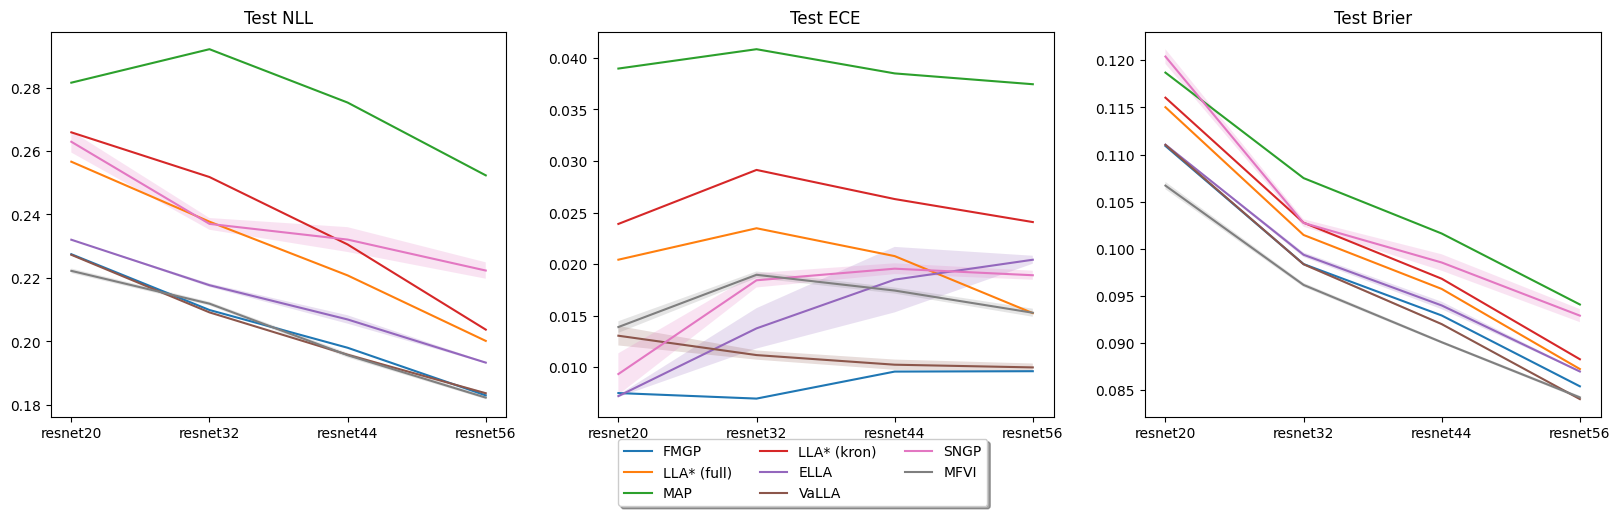

In [18]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
for i, method in enumerate(models):
    # plot mean NLL
    mean = []
    std = []
    for resnet in resnets:
        mean.append(df.loc[(resnet, method), "NLL"]["mean"])
        std.append(df.loc[(resnet, method), "NLL"]["std"])

    axis[0].plot(resnets, mean, label=labels[i])
    axis[0].fill_between(
        resnets,
        np.array(mean) - 2 * np.array(std),
        np.array(mean) + 2 * np.array(std),
        alpha=0.2,
    )
for i, method in enumerate(models):
    # plot mean NLL
    mean = []
    std = []
    for resnet in resnets:
        mean.append(df.loc[(resnet, method), "ECE"]["mean"])
        std.append(df.loc[(resnet, method), "ECE"]["std"])

    axis[1].plot(resnets, mean, label=labels[i])
    axis[1].fill_between(
        resnets,
        np.array(mean) - 2 * np.array(std),
        np.array(mean) + 2 * np.array(std),
        alpha=0.2,
    )

for i, method in enumerate(models):
    # plot mean NLL
    mean = []
    std = []
    for resnet in resnets:
        mean.append(df.loc[(resnet, method), "BRIER"]["mean"])
        std.append(df.loc[(resnet, method), "BRIER"]["std"])

    axis[2].plot(resnets, mean, label=labels[i])
    axis[2].fill_between(
        resnets,
        np.array(mean) - 2 * np.array(std),
        np.array(mean) + 2 * np.array(std),
        alpha=0.2,
    )

axis[0].set_title("Test NLL")
axis[1].set_title("Test ECE")
axis[2].set_title("Test Brier")
plt.legend(
    loc="lower center",
    bbox_to_anchor=(-0.75, -0.25),
    ncol=3,
    fancybox=True,
    shadow=True,
)


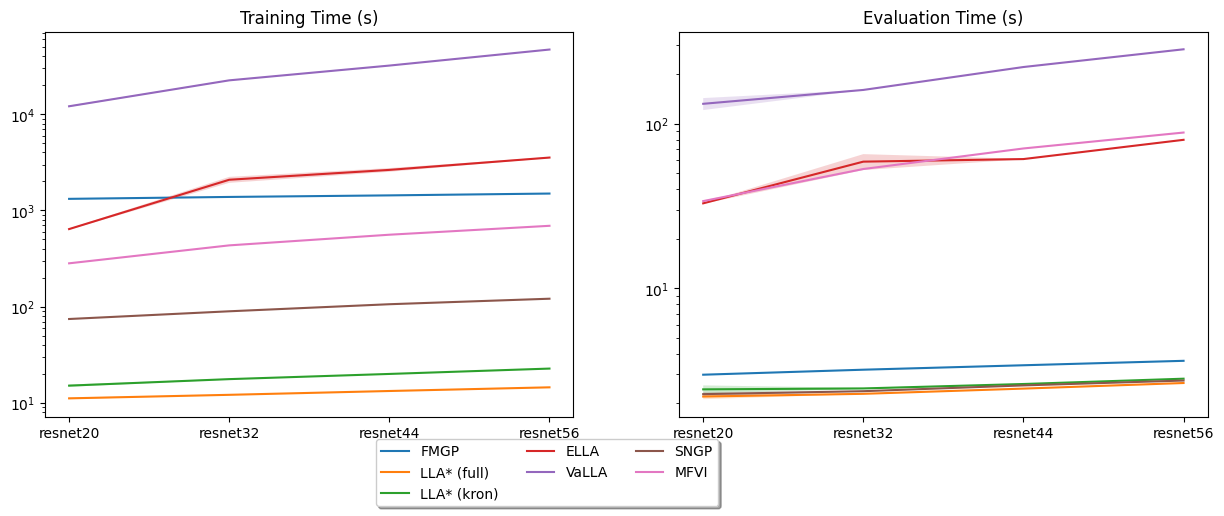

In [19]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
for i, method in enumerate(models):
    if method == "map":
        continue
    # plot mean NLL
    mean = []
    std = []
    for resnet in resnets:
        mean.append(df.loc[(resnet, method), "train_time"]["mean"])
        std.append(df.loc[(resnet, method), "train_time"]["std"])

    axis[0].plot(resnets, mean, label=labels[i])
    axis[0].fill_between(
        resnets,
        np.array(mean) - 2 * np.array(std),
        np.array(mean) + 2 * np.array(std),
        alpha=0.2,
    )
for i, method in enumerate(models):
    if method == "map":
        continue
    # plot mean NLL
    mean = []
    std = []
    for resnet in resnets:
        mean.append(df.loc[(resnet, method), "test_time"]["mean"])
        std.append(df.loc[(resnet, method), "test_time"]["std"])

    axis[1].plot(resnets, mean, label=labels[i])
    axis[1].fill_between(
        resnets,
        np.array(mean) - 2 * np.array(std),
        np.array(mean) + 2 * np.array(std),
        alpha=0.2,
    )

axis[0].set_title("Training Time (s)")
axis[1].set_title("Evaluation Time (s)")
axis[0].set_yscale("log")
axis[1].set_yscale("log")

plt.legend(
    loc="lower center",
    bbox_to_anchor=(-0.25, -0.25),
    ncol=3,
    fancybox=True,
    shadow=True,
)


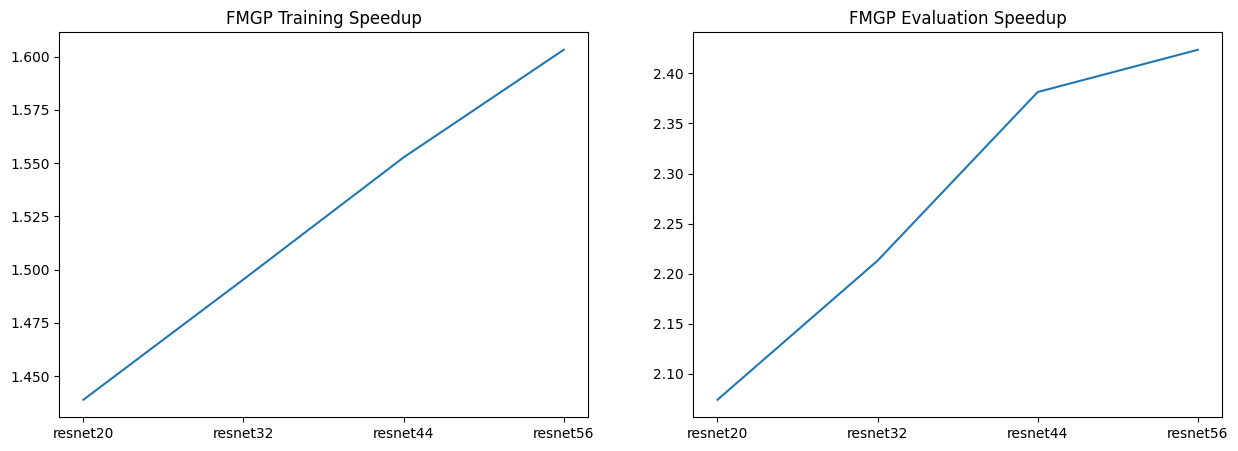

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
axis[0].plot(
    resnets,
    [
        df.loc[(resnet, "fmgp slow"), "train_time"]["mean"]
        / df.loc[(resnet, "fmgp"), "train_time"]["mean"]
        for resnet in resnets
    ],
)
axis[0].set_title("FMGP Training Speedup")
axis[1].plot(
    resnets,
    [
        df.loc[(resnet, "fmgp slow"), "test_time"]["mean"]
        / df.loc[(resnet, "fmgp"), "test_time"]["mean"]
        for resnet in resnets
    ],
)
axis[1].set_title("FMGP Evaluation Speedup")
plt.show()


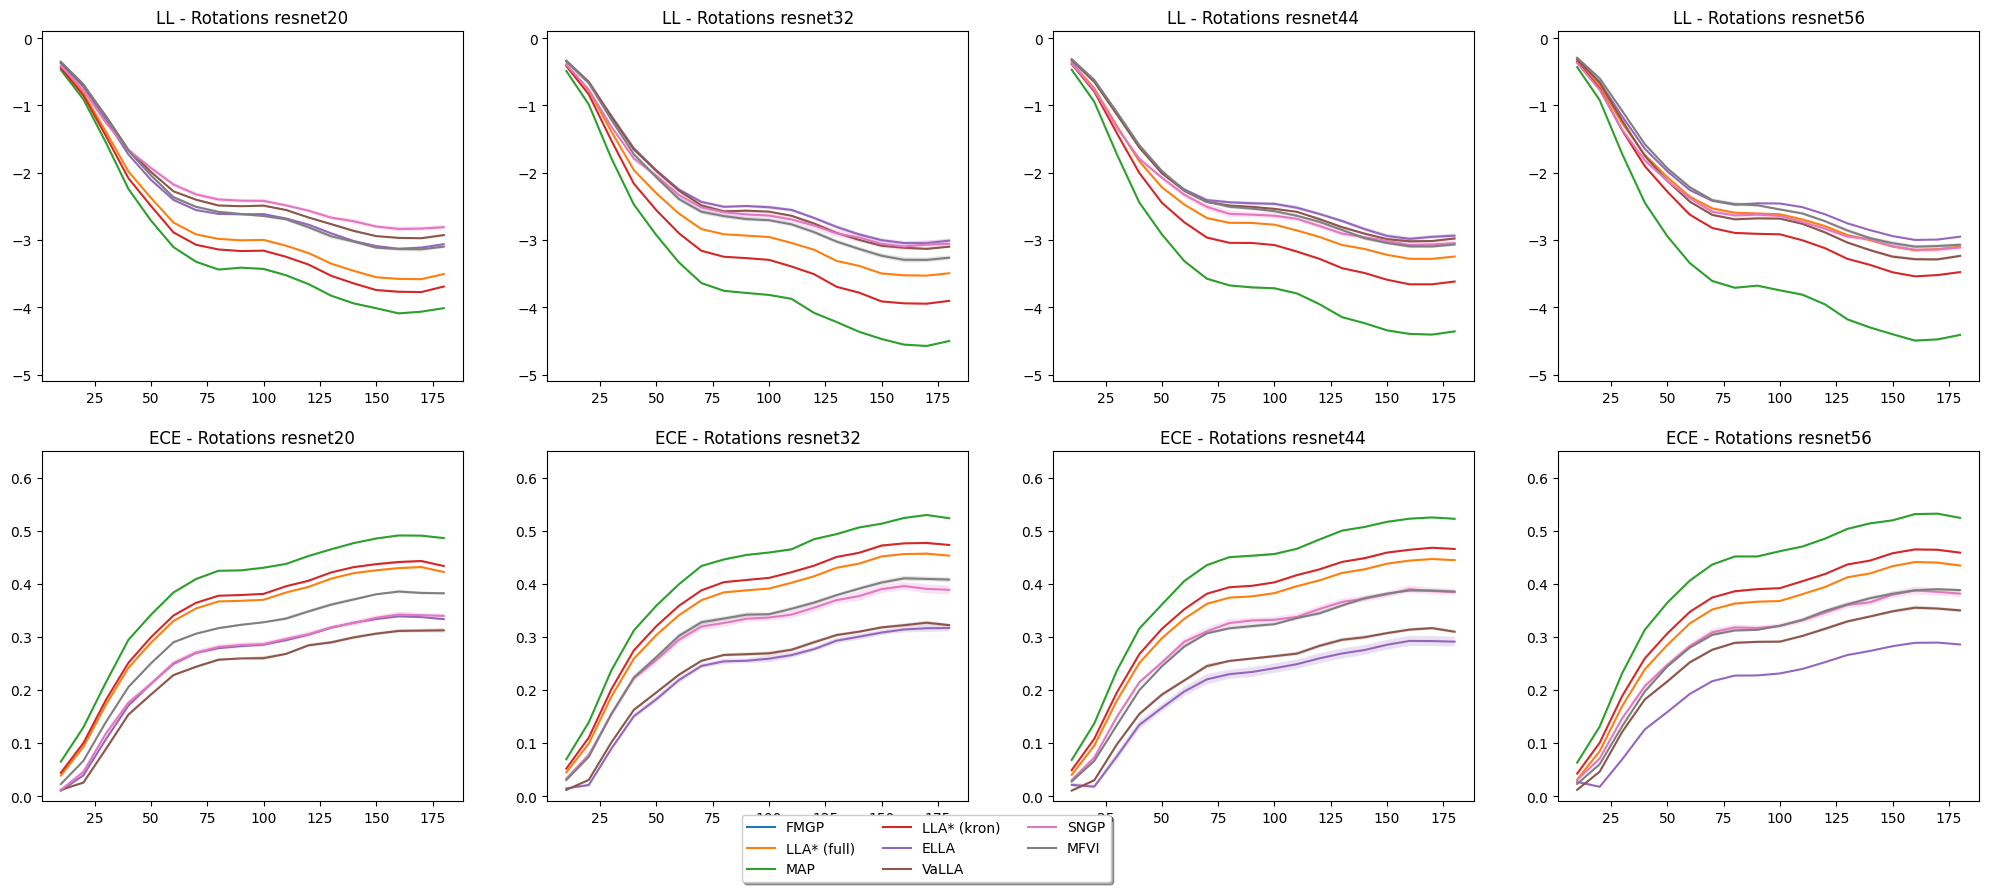

In [21]:
fig, axis = plt.subplots(2, 4, figsize=(25, 10))
for i, resnet in enumerate(resnets):
    for j, method in enumerate(models):
        # plot mean NLL
        mean = []
        std = []
        for angle in np.arange(10, 190, 10):
            mean.append(-df.loc[(resnet, method), f"rotated_{int(angle)}_NLL"]["mean"])
            std.append(df.loc[(resnet, method), f"rotated_{int(angle)}_NLL"]["std"])

        axis[0, i].plot(np.arange(10, 190, 10), mean, label=labels[j])
        axis[0, i].fill_between(
            np.arange(10, 190, 10),
            np.array(mean) - 2 * np.array(std),
            np.array(mean) + 2 * np.array(std),
            alpha=0.2,
        )
    axis[0, i].set_ylim(-5.1, 0.1)
    axis[0, i].set_title("LL - Rotations " + resnet)
for i, resnet in enumerate(resnets):
    for j, method in enumerate(models):
        # plot mean NLL
        mean = []
        std = []
        for angle in np.arange(10, 190, 10):
            mean.append(df.loc[(resnet, method), f"rotated_{int(angle)}_ECE"]["mean"])
            std.append(df.loc[(resnet, method), f"rotated_{int(angle)}_ECE"]["std"])

        axis[1, i].plot(np.arange(10, 190, 10), mean, label=labels[j])
        axis[1, i].fill_between(
            np.arange(10, 190, 10),
            np.array(mean) - 2 * np.array(std),
            np.array(mean) + 2 * np.array(std),
            alpha=0.2,
        )
    axis[1, i].set_title("ECE - Rotations " + resnet)
    axis[1, i].set_ylim(-0.01, 0.65)

# Legend outside plot
plt.legend(
    loc="lower center", bbox_to_anchor=(-1.5, -0.25), ncol=3, fancybox=True, shadow=True
)
plt.show()
